In [1]:
#Importing the required libraries
import pandas as pd   # for reading the csv files 
import numpy as np    # for matrix multiplications during forward and backward propagations
import matplotlib.pyplot as plt # for plotting the error plot
from sklearn.model_selection import train_test_split # for splitting the data into train and test

In [2]:
class Preprocessing:
    df = pd.read_csv('ce889_dataCollection.csv',header = None)
    # for dropping the duplicates
    df.drop_duplicates(inplace = True)
    # checking for null values
    print("Checking For Null values", df.isnull().sum())
    # Giving column names
    df.columns = ["X distance to target","Y distance to target","New Vel Y","New Vel X"]
    # normalization
    data_min = df.min()
    data_max = df.max()
    normalizeddata = (df - df.min()) / (df.max() - df.min())
    # spliting data
    training , testing= train_test_split(normalizeddata, test_size = 0.2)
    print("Shape of Training Data", training.shape)
    print("Shape of Testing Data", testing.shape)
    # Splitting inputs & outputs for training, validation & testing data
    x_train_input = np.array(training[["X distance to target","Y distance to target"]]).T
    y_train_output = np.array(training[["New Vel Y","New Vel X"]]).T

    x_testing_input = np.array(testing[["X distance to target","Y distance to target"]]).T
    y_testing_output = np.array(testing[["New Vel Y","New Vel X"]]).T

Checking For Null values 0    0
1    0
2    0
3    0
dtype: int64
Shape of Training Data (33961, 4)
Shape of Testing Data (8491, 4)


In [3]:
#Defining Sigmoid Function
class Sig:
    def sigmoid(x):  
        return 1/(1+np.exp(-x*0.01))
    def sigmoid_derivative(x):  
        return x*(1-x)

In [4]:
#Forward Propagation
class FP:
    def fwd_propagation(x_fwd_input, model):    
        Weight_hidden, bias_hidden, Weight_output, bias_output = model['w1'], model['b1'], model['w2'], model['b2']
        z1 = np.dot(Weight_hidden, x_fwd_input) +bias_hidden
        a1 = Sig.sigmoid(z1)     #activation layer
        z2 = np.dot(Weight_output, a1) + bias_output
        a2 = Sig.sigmoid(z2)
        return(a2)  

In [5]:
#calculating loss
class Loss:
    def calculate_loss(model, x_trainloss, y_trainloss):
       #calling model prediction
        Weight_hidden, bias_hidden, Weight_output, bias_output = model['w1'], model['b1'], model['w2'], model['b2']
        z1 = np.dot(Weight_hidden, x_trainloss) +bias_hidden
        a1 = Sig.sigmoid(z1)  #activation layer
        z2 = np.dot(Weight_output, a1) + bias_output
        a2 = Sig.sigmoid(z2) 
        rmserror = np.mean(np.square(y_trainloss - a2))
        z2 = np.dot(Weight_output, a1) + bias_output
        a2 = Sig.sigmoid(z2)
        return rmserror

In [6]:
#Backward Propagation
class BP:
    
    def back_propagation(model,x_train_input, a2, error, r_lambda, l_rate, alpha):
        Weight_hidden, bias_hidden, Weight_output, bias_output, dWeight_hidden_old, dWeight_output_old = model['w1'], model['b1'], model['w2'], model['b2'], model['dw1_old'], model['dw2_old']
    
        delta2 = r_lambda *(error * Sig.sigmoid_derivative(a2))
        a1 = Sig.sigmoid(np.dot(Weight_hidden, x_train_input) +bias_hidden)  
        delta1 = r_lambda * np.dot(Weight_output.T, delta2)*Sig.sigmoid_derivative(a1)
      
        dWeight_output = np.dot(delta2, a1.T)
        dWeight_hidden = np.dot(delta1, x_train_input.T)
        dbias_output = np.sum(delta2, axis=1, keepdims=True)
        dbias_hidden = np.sum(delta1, axis=1, keepdims=True)
        
        # update the weights with the derivative (slope) of the loss function
        Weight_hidden += l_rate*dWeight_hidden +  alpha * dWeight_hidden_old
        Weight_output += l_rate*dWeight_output + alpha * dWeight_output_old
        bias_hidden += l_rate*dbias_hidden
        bias_output += l_rate*dbias_output
        # Assign new parameters to the model
        model = { 'w1': Weight_hidden, 'b1': bias_hidden, 'w2': Weight_output, 'b2': bias_output, "dw1_old":dWeight_hidden, "dw2_old": dWeight_output}
        return model

In [7]:
class Build_Model:
    
    #Building Model
    def build_model(x_train_input, y_train_output,n_hidden, r_lambda, l_rate, alpha, epochs):
    
        #initialize parameters to random values
        Weight_hidden = np.random.rand(n_hidden,2) 
        bias_hidden = np.zeros((n_hidden,1))
        Weight_output = np.random.rand(2,n_hidden) 
        bias_output = np.zeros((2,1))
    
        #gradient momentum initilizations
        dWeight_hidden_old = np.zeros((n_hidden,2))
        dWeight_output_old = np.zeros((2,n_hidden))
    
        #Declaring dictonary for storing parameters for later use
        model = {}
    
        # Assign new parameters to the model
        model = { 'w1': Weight_hidden,'b1': bias_hidden, 'w2': Weight_output, 'b2': bias_output, "dw1_old":dWeight_hidden_old, "dw2_old": dWeight_output_old}
    
        training_loss= []

        for i in range(0, epochs):
        
            #forward propagation
            a2 = FP.fwd_propagation(x_train_input, model)
            error = 2*(y_train_output - a2)
        
            #backward propagation
            model = BP.back_propagation(model,x_train_input, a2, error, r_lambda, l_rate, alpha)
                
            rmserror  = Loss.calculate_loss(model, x_train_input, y_train_output)

            training_loss.append(rmserror)
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if i % 100 == 0:
                print("Loss after iteration %i: training loss = %f  " %(i,rmserror))
     
        return model, training_loss

In [11]:
# Giving the hyperparameters, training the model and finding the loss
# Here alpha is momentum, l_rate is learning rate, r_lambda is the lambda in activation function (sigmoid)
# Tried r_lambda, alpha and l_rate from 0.01 to 0.1, found the below values as best
model, training_loss = Build_Model.build_model(Preprocessing.x_train_input, Preprocessing.y_train_output,n_hidden= 8, epochs = 301, alpha=0.1, r_lambda = 0.1, l_rate=0.01)

Loss after iteration 0: training loss = 0.039989  
Loss after iteration 100: training loss = 0.038379  
Loss after iteration 200: training loss = 0.031562  
Loss after iteration 300: training loss = 0.025819  


In [12]:
# hidden weights
print("self.Weight_hidden =", repr(model["w1"]), "\nself.Weight_output = ",repr(model["w2"]), "\nself.bias_hidden = ",repr(model["b1"]),"\nself.bias_output = ",repr(model["b2"]))

self.Weight_hidden = array([[  17.96927307, -383.69163623],
       [-480.67944049,  206.73651188],
       [ -65.97794433, -105.91821445],
       [ -83.71395469,  188.72470677],
       [ -93.04744302,  -48.95790432],
       [-508.63269245,  218.2507341 ],
       [  -4.46180285,  199.0324327 ],
       [ 104.55446451,   93.75354825]]) 
self.Weight_output =  array([[ 147.17055995,  -83.84449172,   59.8774426 ,  -34.25197004,
          42.34455347,  -85.86609344,  -37.46311429,   -8.45054014],
       [  -0.75197962, -106.28794451,  -16.37547644,  -13.9778771 ,
         -23.72148039, -118.33708132,   15.38695328,   58.34357283]]) 
self.bias_hidden =  array([[ 22.80986968],
       [-20.503655  ],
       [  6.25682775],
       [ -7.08467266],
       [  3.7068635 ],
       [-15.65528419],
       [ -6.67916336],
       [ -7.19258046]]) 
self.bias_output =  array([[16.2079465 ],
       [ 7.62853964]])


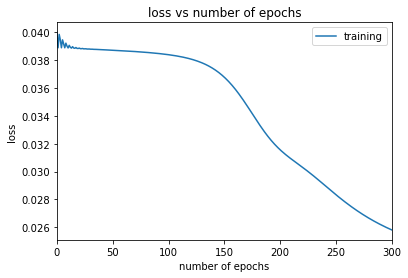

In [14]:
def plot_erros(training_loss):
    plt.plot(training_loss)
    plt.xlabel('number of epochs')
    plt.ylabel('loss')
    plt.title('loss vs number of epochs')
    plt.legend(['training'], loc='upper right')
    plt.xlim(0, 300)
    plt.show()
plot_erros(training_loss)